## Life Expectancy Prediction Analysis

### This notebook analyzes a dataset containing various health and economic indicators to predict life expectancy.

## 1. Data Loading and Initial Exploration

In [400]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import TargetEncoder
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import RobustScaler
from xgboost import XGBRegressor

In [401]:
# Load the dataset
train_df = pd.read_csv('~/Downloads/train.csv')
test_df = pd.read_csv('~/Downloads/test.csv')

In [402]:
# Romove 'ID' column
train_df = train_df.drop(columns=['ID'])

In the given dataset, the 'ID' column serves as an index and is not required for further analysis or modeling. Since the 'ID' column doesn't provide any useful information for our machine learning tasks, we can safely remove it.

## 2. Exploratory Data Analysis (EDA)

In [405]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2071 entries, 0 to 2070
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   TARGET_LifeExpectancy         2071 non-null   float64
 1   Country                       2071 non-null   int64  
 2   Year                          2071 non-null   int64  
 3   Status                        2071 non-null   int64  
 4   AdultMortality                2070 non-null   float64
 5   AdultMortality-Male           2071 non-null   int64  
 6   AdultMortality-Female         2071 non-null   int64  
 7   SLS                           2071 non-null   int64  
 8   Alcohol                       2067 non-null   float64
 9   PercentageExpenditure         2062 non-null   float64
 10  Measles                       2070 non-null   float64
 11  BMI                           2063 non-null   float64
 12  Under5LS                      2070 non-null   float64
 13  Pol

The `train_df.info()` method in pandas is used to display a concise summary of the DataFrame, `train_df`. It provides information about the structure and contents of the DataFrame, helping us understand the dataset at a glance.


In [407]:
# Display basic info
print("Dataset shape:", train_df.shape)
print("First 5 rows:")
train_df.head()

Dataset shape: (2071, 23)
First 5 rows:


,TARGET_LifeExpectancy,Country,Year,Status,AdultMortality,AdultMortality-Male,AdultMortality-Female,SLS,Alcohol,PercentageExpenditure,...,Polio,TotalExpenditure,Diphtheria,HIV-AIDS,GDP,Population,Thinness1-19years,Thinness5-9years,IncomeCompositionOfResources,Schooling
0,67.1,146,2017,0,263.0,262,264,62,0.01,71.279624,...,6.0,8.16,65.0,0.1,654.37,33736494.0,17.2,17.3,0.479,3.178050
1,59.8,146,2016,0,271.0,278,264,64,0.01,73.523582,...,58.0,8.18,62.0,0.1,686.22,327582.0,17.5,17.5,0.476,3.162278
2,57.6,146,2015,0,268.0,246,290,66,0.01,73.219243,...,62.0,8.13,64.0,0.1,707.55,31731688.0,17.7,17.7,0.470,3.146427
3,55.5,146,2014,0,272.0,248,296,69,0.01,78.184215,...,67.0,8.52,67.0,0.1,750.35,3696958.0,17.9,18.0,0.463,3.130495
4,57.7,146,2013,0,275.0,278,272,71,0.01,7.097109,...,68.0,7.87,68.0,0.1,71.16,2978599.0,18.2,18.2,0.454,3.082207


The `train_df.shape()` method is used to print the shape of the dataset, showing the number of rows and columns. While the `train_df.head()` methos is used to display the first 5 rows of the dataset, providing a preview of the data

In [409]:
# Basic statistics
print("Basic statistic:")
train_df.describe()

Basic statistic:


,TARGET_LifeExpectancy,Country,Year,Status,AdultMortality,AdultMortality-Male,AdultMortality-Female,SLS,Alcohol,PercentageExpenditure,...,Polio,TotalExpenditure,Diphtheria,HIV-AIDS,GDP,Population,Thinness1-19years,Thinness5-9years,IncomeCompositionOfResources,Schooling
count,2071.000000,2071.000000,2071.000000,2071.000000,2070.00000,2071.000000,2071.000000,2071.000000,2067.000000,2062.000000,...,2070.000000,2061.000000,2071.000000,2068.000000,2062.000000,2.063000e+03,2070.000000,2070.000000,2066.000000,2064.000000
mean,69.274505,95.360212,2009.518590,0.185418,162.82029,161.908257,163.759536,33.079672,4.693009,764.429066,...,82.720773,5.881827,82.753259,1.632544,7304.336600,1.205231e+07,4.939034,4.977971,0.609866,3.372332
std,9.482281,54.861641,4.614147,0.388730,118.89928,119.442235,118.800292,135.832868,4.205270,2083.501026,...,23.192604,2.557347,23.130969,4.784991,15179.036764,6.403752e+07,4.697848,4.786593,0.216610,0.590975
min,37.300000,0.000000,2002.000000,0.000000,1.00000,0.000000,2.000000,0.000000,0.010000,0.000000,...,3.000000,0.370000,2.000000,0.100000,1.880000,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,63.000000,50.000000,2006.000000,0.000000,74.00000,74.000000,74.000000,0.000000,0.615000,5.688828,...,77.000000,4.180000,78.000000,0.100000,413.730000,1.274450e+05,1.600000,1.500000,0.463000,3.065942
50%,71.200000,94.000000,2010.000000,0.000000,144.00000,142.000000,144.000000,3.000000,3.820000,68.943329,...,93.000000,5.640000,93.000000,0.100000,1390.315000,6.477440e+05,3.200000,3.300000,0.655500,3.449638
75%,76.000000,144.000000,2014.000000,0.000000,228.00000,228.000000,230.000000,22.000000,7.840000,429.434148,...,97.000000,7.430000,97.000000,0.800000,5746.287500,5.364814e+06,7.375000,7.400000,0.770000,3.741657
max,92.700000,192.000000,2017.000000,1.000000,699.00000,704.000000,722.000000,1800.000000,17.870000,19479.911610,...,99.000000,17.600000,99.000000,50.600000,133473.470000,1.293859e+09,27.700000,28.600000,0.948000,4.381780


The `train_df.describe()` method generates summary statistics for the numerical columns in the dataset, including measures such as count, mean, standard deviation, minimum, maximum, and percentiles (25%, 50%, and 75%).

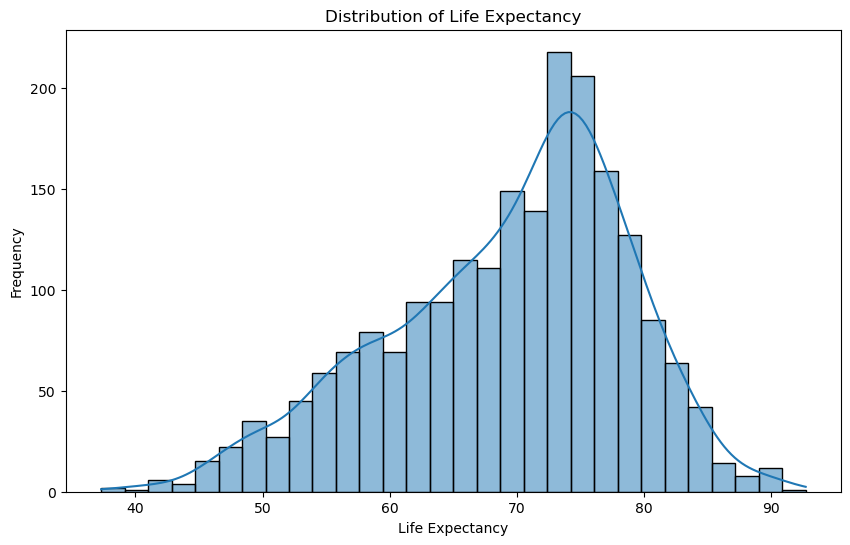

In [411]:
# Distribution of target variable
plt.figure(figsize=(10,6))
sns.histplot(train_df['TARGET_LifeExpectancy'], bins = 30, kde=True)
plt.title('Distribution of Life Expectancy')
plt.xlabel('Life Expectancy')
plt.ylabel('Frequency')
plt.show()

This code visualizes the distribution of the `TARGET_LifeExpectancy` variable using a histogram with 30 bins and a kernel density estimate (KDE) curve. The plot provides a clear view of the frequency distribution of life expectancy values in the dataset. The output shows that the majority of the life expectancy values are concentrated in the range of 70-80 years, indicating a peak in this range and a generally normal distribution for this variable.

<Figure size 1200x800 with 0 Axes>

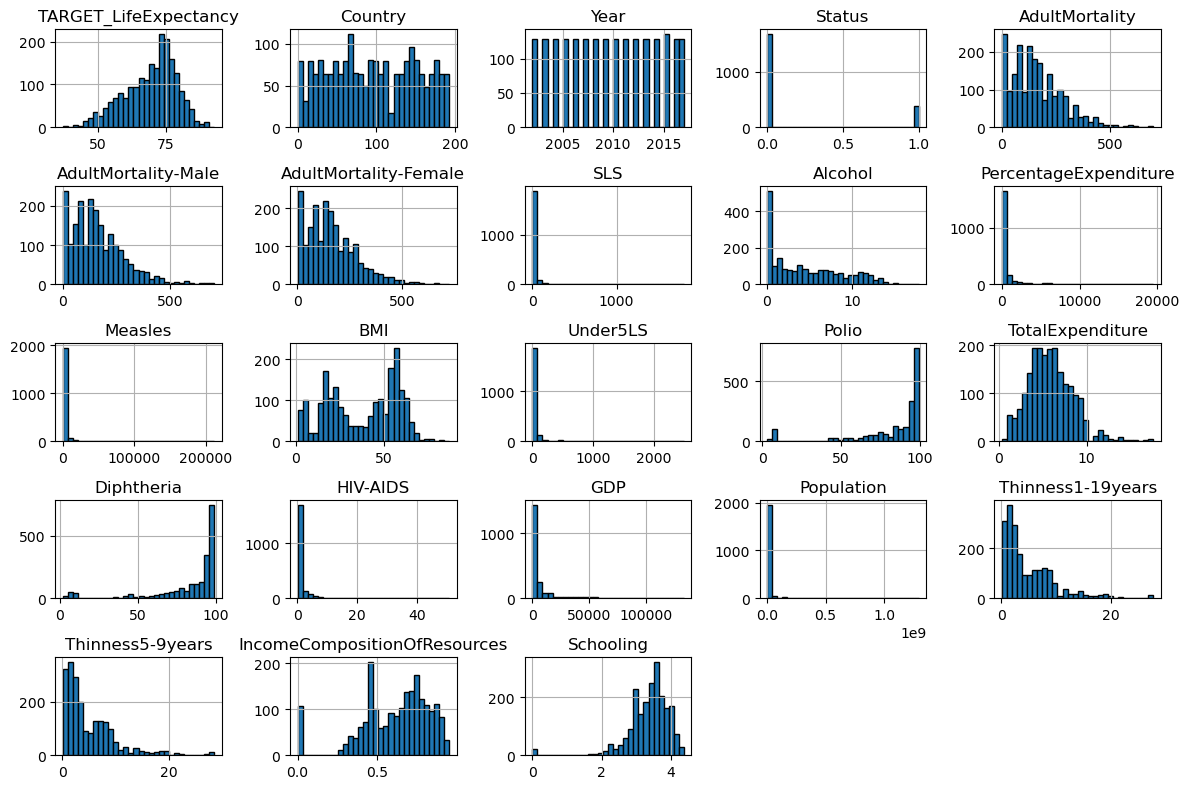

In [413]:
# Plot histograms for each feature in the dataset
plt.figure(figsize=(12, 8))  # Adjust figure size for better visibility
train_df.hist(bins=30, figsize=(12, 8), edgecolor='black')  
plt.tight_layout()  # Adjust spacing between plots
plt.show()

This code generates histograms for each feature in the `train_df` dataset to visualize the distribution of all numerical variables. The output will display multiple histograms, one for each numerical feature, helping to analyze the distribution and spread of the data.

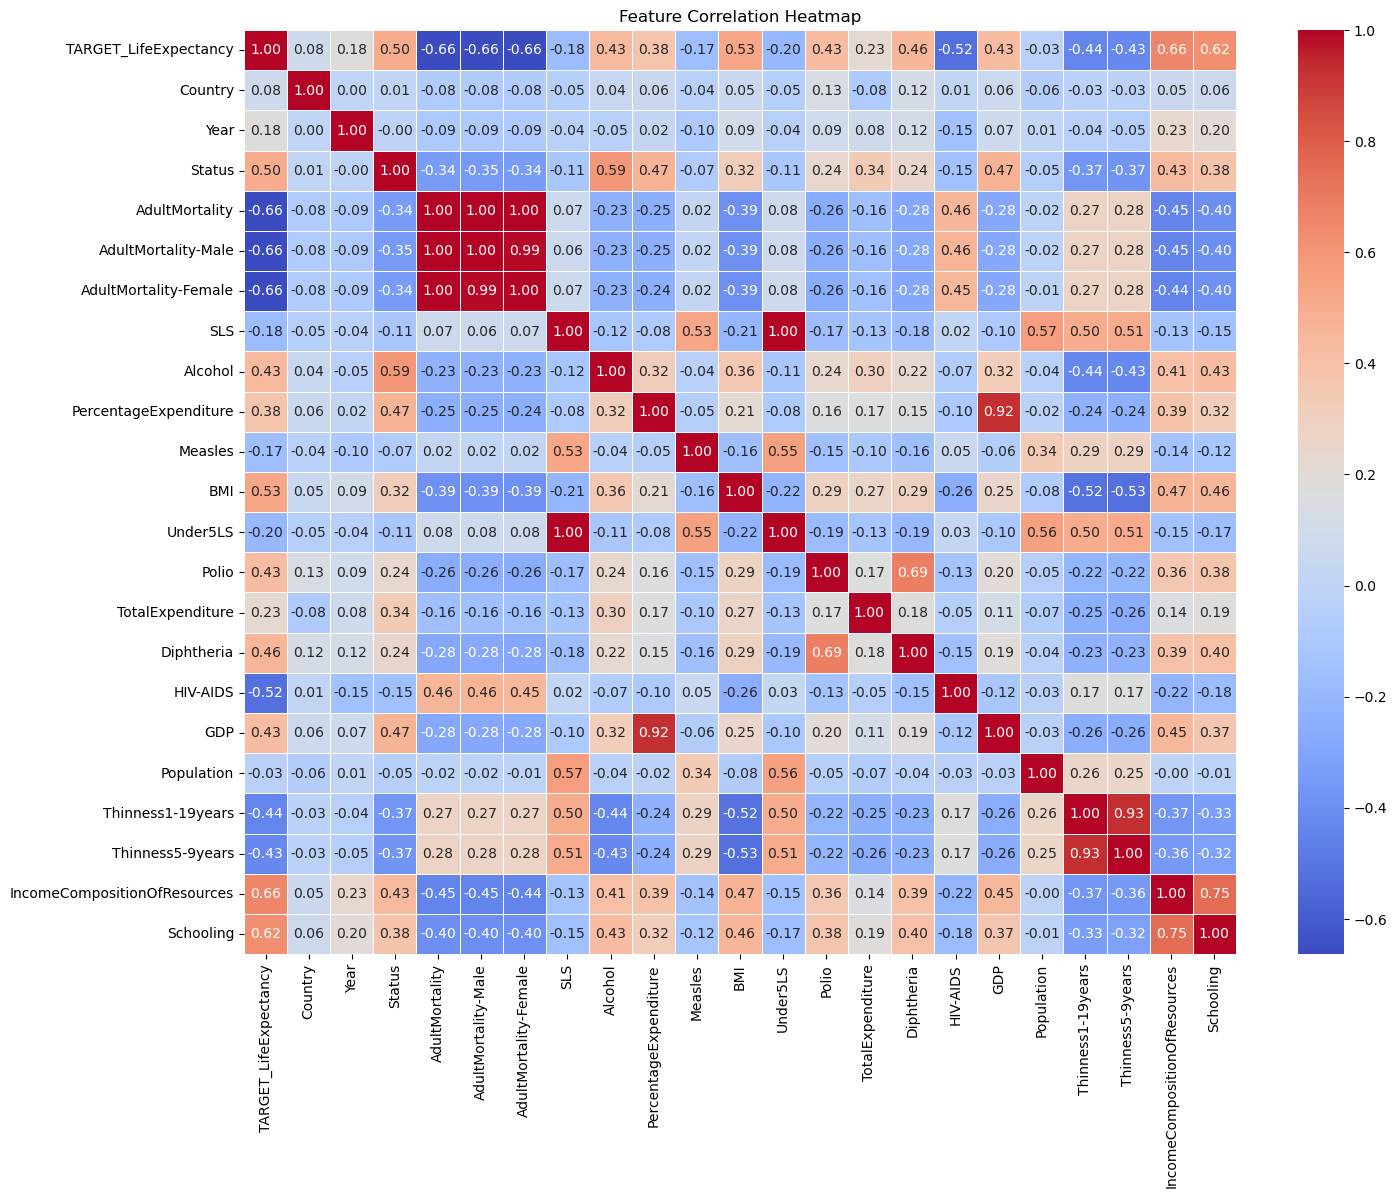

In [415]:
# Plot correlation heatmap
plt.figure(figsize=(16,12)) 
corr_matrix = train_df.corr()
sns.heatmap(train_df.corr(), cmap="coolwarm", annot=True, fmt='.2f', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

We plotted the correlation heatmap to visualize the relationships between different features in the dataset. The heatmap shows the correlation values between pairs of features, helping us identify which variables are most strongly correlated with each other, especially with the target variable: **Life Expectancy**. 
It reveals that strong correlations with features like **Income Composition of Resources**, **Schooling**, and **Adult Mortality** highlight key factors influencing life expectancy across different populations.

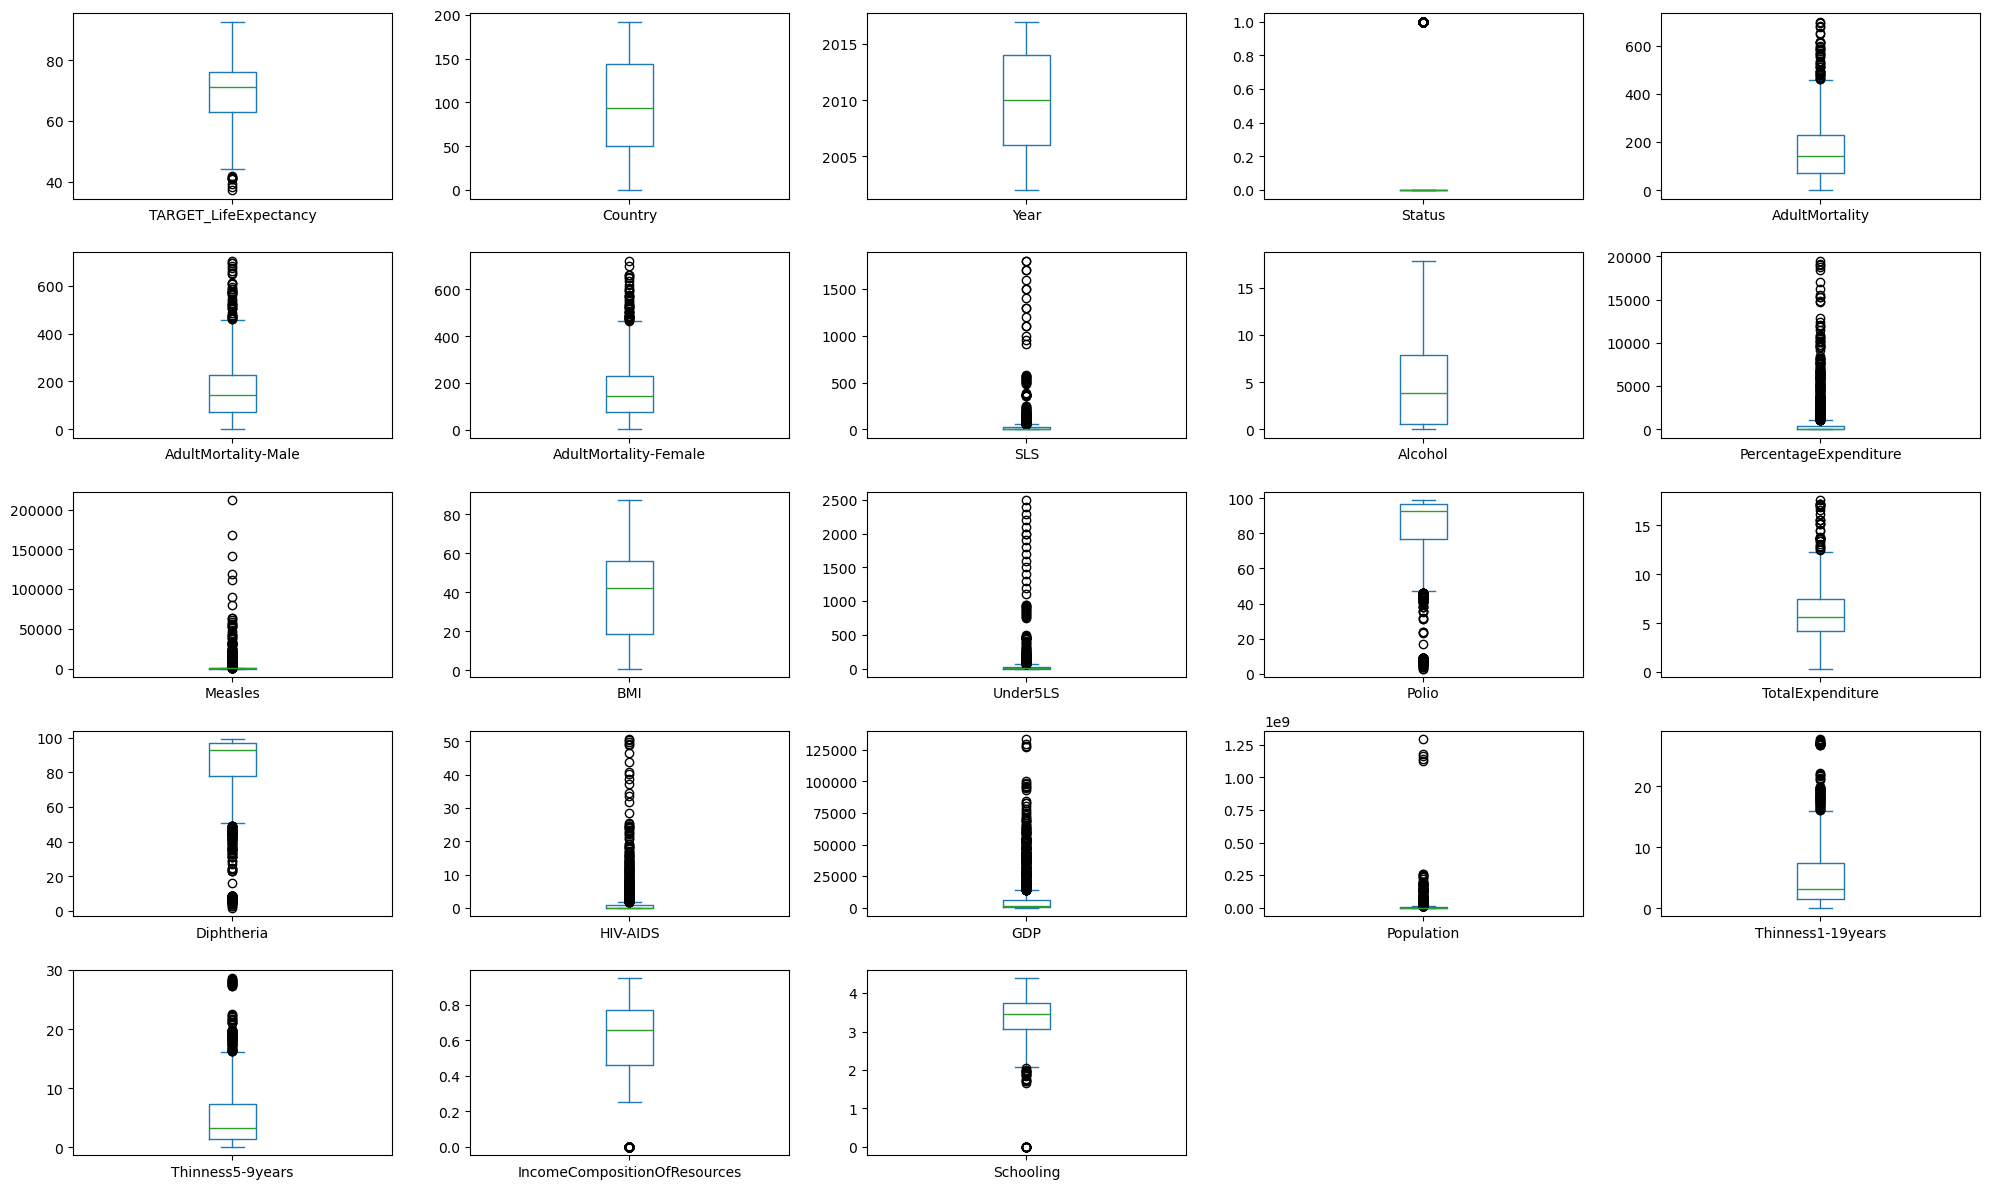

In [417]:
# Box plots for all features in the dataset
train_df.plot(kind='box', subplots=True, layout=(5,5), sharex=False, sharey=False, figsize=(20,12))
plt.tight_layout()
plt.show()

This code generates box plots for all features in the `train_df` dataset to visually assess the distribution and identify outliers. The output reveals that most features, except for `Country`, `Year Alcohol`, and `BMI`, contain outliers, as indicated by the points outside the whiskers of the box plots.

In [419]:
def detect_outliers(df, threshold=1.5):
    """
    Detects outliers in specified columns using the IQR method.
    Returns a dictionary with column names and the number of outliers detected.
    """
    outliers_dict = {}
    for col in df.columns:
        # Calculate the IQR for each feature
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        # Define the lower and upper bounds for outliers
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        # Check which rows are outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outliers_dict[col] = len(outliers)
    return outliers_dict

detect_outliers(train_df)

{'TARGET_LifeExpectancy': 9,
 'Country': 0,
 'Year': 0,
 'Status': 384,
 'AdultMortality': 42,
 'AdultMortality-Male': 42,
 'AdultMortality-Female': 44,
 'SLS': 201,
 'Alcohol': 0,
 'PercentageExpenditure': 299,
 'Measles': 378,
 'BMI': 0,
 'Under5LS': 240,
 'Polio': 183,
 'TotalExpenditure': 33,
 'Diphtheria': 206,
 'HIV-AIDS': 365,
 'GDP': 295,
 'Population': 286,
 'Thinness1-19years': 79,
 'Thinness5-9years': 83,
 'IncomeCompositionOfResources': 108,
 'Schooling': 40}

This code calculates the Interquartile Range (IQR) for each feature in the dataset to detect outliers. It first computes the 25th (Q1) and 75th (Q3) percentiles, then calculates the IQR as the difference between Q3 and Q1. The lower and upper bounds for outliers are defined as 1.5 times the IQR below Q1 and above Q3. The code then checks each feature to identify the number of outliers by comparing the values against these bounds and prints the count of outliers in each feature.

In [421]:
# Check for missing values
print("Missing values per column:")
missing_values = pd.isna(train_df).sum().sort_values(ascending=False)
missing_values = missing_values[missing_values > 0]  # Filter only columns with missing values

missing_values

Missing values per column:


TotalExpenditure                10
PercentageExpenditure            9
GDP                              9
BMI                              8
Population                       8
Schooling                        7
IncomeCompositionOfResources     5
Alcohol                          4
HIV-AIDS                         3
AdultMortality                   1
Measles                          1
Thinness5-9years                 1
Under5LS                         1
Polio                            1
Thinness1-19years                1
dtype: int64

This code checks for missing values in the `train_df` dataset. It uses `pd.isna()` to identify NaN values, then calculates the sum of missing values per column. The result is sorted in descending order, and only columns with missing values are displayed by filtering out columns with no missing data. The final output lists the columns that have missing values along with the count of missing entries for each.

## 3. Data Cleaning

In [424]:
# Handle missing values
numerical_cols = train_df.select_dtypes(include=['int64', 'float64']).columns

# Impute missing values
train_df[numerical_cols] = train_df[numerical_cols].fillna(train_df[numerical_cols].median())

In any dataset, missing values can negatively impact model performance and must be handled appropriately. One common approach is to impute missing values using the median value of each column. Since we observed that all missing values are in numerical columns, we explicitly select them to avoid applying numerical imputation to categorical features, which would not be appropriate.

In [426]:
# Verify if all missing values are handled
print("Missing values after imputation:")
print(pd.isna(train_df).sum().sum()) # Should return 0 if all missing values are filled

Missing values after imputation:
0


In [427]:
# Drop rows with missing values
train_df.dropna(inplace=True)

In cases where missing values are present and cannot be imputed, we may choose to remove them to maintain data integrity.

In [429]:
# Check for duplicates
duplicates = train_df.duplicated().sum()
print(f"Duplicate rows: {duplicates}")

Duplicate rows: 0


In [430]:
# Remove duplicates
train_df.drop_duplicates(inplace=True)

Duplicate rows in the dataset can lead to biased model training and inaccurate analysis. To ensure data quality, we check for and remove duplicates.

In [432]:
# Print summary after cleaning
print("Data Cleaning Completed!")
print("Shape after cleaning:", train_df.shape)
print("Missing values per column:\n", train_df.isna().sum().sort_values(ascending=False))

Data Cleaning Completed!
Shape after cleaning: (2071, 23)
Missing values per column:
 TARGET_LifeExpectancy           0
Under5LS                        0
IncomeCompositionOfResources    0
Thinness5-9years                0
Thinness1-19years               0
Population                      0
GDP                             0
HIV-AIDS                        0
Diphtheria                      0
TotalExpenditure                0
Polio                           0
BMI                             0
Country                         0
Measles                         0
PercentageExpenditure           0
Alcohol                         0
SLS                             0
AdultMortality-Female           0
AdultMortality-Male             0
AdultMortality                  0
Status                          0
Year                            0
Schooling                       0
dtype: int64


## 4. Data Preprocessing

In [434]:
num_countries = train_df['Country'].nunique()
print(f"Number of unique countries: {num_countries}")

# Convert categorical variables
train_df['Country'] = train_df['Country'].astype('category')
test_df['Country'] = test_df['Country'].astype('category')

Number of unique countries: 136


As we have seen in the histogram plot, the `Status` and `Country` columns are categorical. However, we **only convert the `Country` column** to categorical because:  

1. **Country has 136 unique values**, and converting it to `category` helps **reduce memory usage**.  
2. **Encoding methods like Target Encoding or Frequency Encoding** require categorical data for better processing.  
3. **Status is already binary (0 and 1)**, which most machine learning models handle efficiently as integers. Converting it to categorical would not provide additional benefits.  

In [436]:
# Feature Encoding
def target_encode(train_df, test_df, categorical_cols, target_col):
    """
    Applies Target Encoding to categorical features in both train and test datasets.
    """
    # Initialize the encoder
    encoder = TargetEncoder()

    # Apply encoding on the training set
    train_df[categorical_cols] = encoder.fit_transform(train_df[categorical_cols], train_df[target_col])

    # Apply the same encoding on the test set (without refitting)
    test_df[categorical_cols] = encoder.transform(test_df[categorical_cols])

    return train_df, test_df, encoder

train_df, test_df, encoder = target_encode(train_df, test_df, ['Country'], 'TARGET_LifeExpectancy')

Since the 'Country' column contains **136 unique values**, it is a **high-cardinality categorical feature**. Choosing the right encoding technique is crucial to avoid issues like increased dimensionality, loss of meaningful relationships, or introducing unnecessary complexity.

## Why Choose Target Encoding? ##
Target Encoding replaces each category with the mean of the target variable (TARGET_LifeExpectancy) for that category. This makes it effective for high-cardinality categorical features like 'Country'. 

Captures relationship with the target variable: It encodes 'Country' based on the mean life expectancy for each country, making it more relevant for predictive modeling.

Efficient for high-cardinality features: Unlike OHE, it reduces dimensionality by replacing 136 country names with just one numerical column.

More meaningful than Label Encoding: Instead of arbitrary numbers, it assigns a value that has statistical significance.

**Below are the key reasons why we chose this method over others:**

**Why Not One-Hot Encoding (OHE)?**

One-Hot Encoding creates a separate binary column for each unique category.

Problem with high cardinality: Since 'Country' has 136 unique values, OHE would create 136 new columns, drastically increasing dataset size and leading to the curse of dimensionality.

Sparsity issue: The dataset becomes sparse (mostly zeros), making it inefficient for models like linear regression.

Slower model training: More features mean increased computational cost and longer training times.

**Why Not Label Encoding?**

Label Encoding assigns an integer value to each category (e.g., 'USA' = 1, 'India' = 2, 'China' = 3).

Problem: This introduces a false ordinal relationship, implying that a higher number (e.g., 'China' = 3) is greater than a lower one (e.g., 'USA' = 1), which is incorrect.

Unintended impact on model performance: Many machine learning models interpret numerical values as having an order, which may lead to poor predictions.

**Why Not Frequency Encoding?**

Frequency Encoding assigns each category a value based on how often it appears in the dataset.

Problem: It only captures how common a category is but does not consider its relationship with the target variable (TARGET_LifeExpectancy).

Less informative: Knowing that 'USA' appears 50 times and 'Germany' appears 30 times doesn't help in predicting life expectancy.

In [438]:
def standardize_data(train_df, test_df, target_column):
    """
    Standardizes numerical features in train and test sets using StandardScaler.
    
    Parameters:
    train_df (pd.DataFrame): Training dataset.
    test_df (pd.DataFrame): Test dataset.
    target_column (str): Name of the target variable (to exclude from scaling).

    Returns:
    train_df (pd.DataFrame): Standardized training dataset.
    test_df (pd.DataFrame): Standardized test dataset.
    scaler (StandardScaler): Fitted scaler for future use.
    """
    scaler = StandardScaler()

    # Select numerical columns, excluding the target variable
    numerical_cols = train_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    if target_column in numerical_cols:
        numerical_cols.remove(target_column)  # Ensure target is not scaled

    # Fit scaler on train data & transform both train and test
    train_df[numerical_cols] = scaler.fit_transform(train_df[numerical_cols])
    test_df[numerical_cols] = scaler.transform(test_df[numerical_cols])  # Use the same scaler

    return train_df, test_df, scaler

train_df, test_df, scaler = standardize_data(train_df, test_df, target_column="TARGET_LifeExpectancy")

This code standardizes the numerical features in the dataset using **StandardScaler** from `sklearn.preprocessing`. `StandardScaler()` ensures that each feature has a **mean of 0** and a **standard deviation of 1**. This normalization helps machine learning models perform better by bringing features to a common scale, as shown below:

- **Improve model convergence**: Ensures faster and more stable training for algorithms using gradient descent.  
- **Prevent bias**: Prevents models from giving too much weight to larger numerical values.  
- **Enhance interpretability**: Makes features comparable by bringing them to a common scale.  

To prevent extreme values from distorting our model, we will **handle outliers** using below methods.

In [441]:
def handle_outliers(df, winsorize_columns, log_transform_cols, robust_scale_cols, scaler=None):
    """
    Handles outliers using Winsorization, Log Transformation, and Robust Scaling.
    
    Parameters:
        df (pd.DataFrame): The DataFrame to process.
        winsorize_columns (dict): Dictionary with column names and Winsorization limits.
        log_transform_cols (list): List of columns to apply log transformation.
        robust_scale_cols (list): List of columns to scale using RobustScaler.
        scaler (RobustScaler, optional): Pre-fitted RobustScaler for test data.

    Returns:
        df (pd.DataFrame): Processed DataFrame.
        scaler (RobustScaler): Fitted scaler (only for train data).
    """
    
    # Winsorization to cap extreme outliers
    for col, limits in winsorize_columns.items():
        df[col] = winsorize(df[col], limits)
    
    # Log transformation to reduce skewness
    for col in log_transform_cols:
        df[col] = np.log1p(df[col])  # log1p to handle zero values safely
    
    # Robust scaling for selected features
    if scaler is None:  # Fit only on train set
        scaler = RobustScaler()
        df[robust_scale_cols] = scaler.fit_transform(df[robust_scale_cols])
    else:  # Transform using the fitted scaler for test set
        df[robust_scale_cols] = scaler.transform(df[robust_scale_cols])
    
    return df, scaler

## Why Do We Need to Handle Outliers?
Outliers can significantly impact the performance of our machine learning model by:
- Skewing the data distribution.
- Influencing statistical measures like mean and standard deviation.
- Leading to poor model generalization.

Thus, we implement **three effective techniques** to mitigate outlier effects: **Winsorization, Log Transformation, and Robust Scaling**.

---

**Winsorization (Capping Extreme Values)**
- Some features (e.g., `HIV-AIDS`, `Measles`, `GDP`, `Population`) have extreme values that distort the dataset.
- Winsorization replaces extreme outliers with predefined percentile values.
- This **preserves the distribution** while ensuring outliers don't heavily impact model learning.

**How We Applied It?**
- For each selected feature, we defined capping limits (e.g., **top 10% winsorized for `Measles`**).
- **Prevents extreme values from dominating statistical calculations.**

---

**Log Transformation (Reducing Skewness)**
- Features like **`GDP`, `Population`, `PercentageExpenditure`, and `Measles`** have a **highly skewed distribution**.
- Log transformation **compresses large values** while keeping small values distinguishable.
- It converts **right-skewed distributions** into **normal-like distributions**, improving model performance.

**How We Applied It?**
- Used **`log1p()`** instead of `log()` to handle zero values safely.
- **Helps linear models and gradient-based algorithms learn better.**

---

**Robust Scaling (Handling Features Where Outliers Matter Less)**
- Some features (e.g., `Thinness1-19years`, `Thinness5-9years`, `IncomeCompositionOfResources`) have outliers but **still contain useful variance**.
- Unlike standard scaling (which is sensitive to outliers), **RobustScaler uses the median and IQR**, making it **more resistant to extreme values**.

**How We Applied It?**
- Applied **RobustScaler** to scale selected features **without being affected by outliers**.
- Ensures the model receives consistent feature values for better learning.

---

By combining these three techniques, we ensure **better feature distribution** and **prevent extreme outliers from dominating model learning**.

In [443]:
# Define Winsorization limits
winsorize_columns = {
    'HIV-AIDS': (0, 0.16),
    'Measles': (0, 0.10),
    'PercentageExpenditure': (0, 0.12),
    'GDP': (0, 0.13),
    'Population': (0, 0.14),
    'SLS': (0, 0.10),
    'Diphtheria': (0, 0.10),
    'Under5LS': (0, 0.12),
    'Polio': (0.09, 0),
    'IncomeCompositionOfResources': (0.05, 0),
    'Schooling': (0.02, 0.01)
}

# Define columns for log transformation
log_transform_cols = ['GDP', 'Population', 'PercentageExpenditure', 'Measles']

# Define columns for robust scaling
robust_scale_cols = ['Thinness1-19years', 'Thinness5-9years', 'IncomeCompositionOfResources']

# Process train dataset (fit the scaler)
train_df, robust_scaler = handle_outliers(train_df, winsorize_columns, log_transform_cols, robust_scale_cols)

# Process test dataset (use the same fitted scaler)
test_df, _ = handle_outliers(test_df, winsorize_columns, log_transform_cols, robust_scale_cols, scaler=robust_scaler)

print("Outliers handled successfully for train and test data!")

Outliers handled successfully for train and test data!


## Feature Selection for Outlier Handling  

**How We Chose Methods for Each Feature?**

Different outlier handling techniques are required for different types of features based on their **distribution, variance, and impact on the model**. We categorized features into three groups:

1. **Winsorization** – For extreme outliers that need capping.
2. **Log Transformation** – For highly skewed features.
3. **Robust Scaling** – For features where outliers exist but still contain useful variance.

---

**Features Processed Using Winsorization**

Winsorization replaces extreme values with predefined percentile values to **reduce the impact of outliers without removing valuable information**.

`HIV-AIDS`: Extremely skewed distribution with rare but extreme high values.

`Measles`: Large variance with occasional extreme spikes.

`PercentageExpenditure`: Highly volatile with some exceptionally high values.

`GDP`: Extreme variations across countries, especially in developing vs. developed nations.

`Population`: Large disparities between small and highly populated countries.

`SLS`: Sudden peaks in certain regions that distort analysis.

`Diphtheria`:Outliers appear due to differences in vaccination programs.

`Under5LS`: Some extreme values due to regional health disparities.

`Polio`: Asymmetrically distributed, some extreme values in countries with low vaccination rates.

`IncomeCompositionOfResources`: Skewed with a few extreme low values.

`Schooling`: Some extremely high values (elite education systems) and low outliers (developing countries).

**Winsorization ensures that extreme values do not dominate model training while preserving overall data integrity.**

---

**Features Processed Using Log Transformation**

Log transformation is effective for **highly skewed features** where the difference between small and large values is significant.

`GDP`: Large discrepancies between countries (e.g., developed vs. developing).

`Population`: Some countries have extreme populations compared to others.

`PercentageExpenditure`: Variance is extremely high, log transformation normalizes the spread.

`Measles`: Extreme variation in reported cases across countries, log transformation smooths differences.

**Log transformation helps compress large values while preserving relationships among data points.**

---

**Features Processed Using Robust Scaling**

Robust Scaling uses the **median and IQR**, making it **more resistant to outliers** while retaining feature variance.

`Thinness1-19years`: Some extreme values but still meaningful variations exist.

`Thinness5-9years`: Similar to `Thinness1-19years`, a few extreme but valid values.

`IncomeCompositionOfResources`: Contains a few outliers, but distribution is relatively stable.

**Robust scaling ensures features with some outliers remain usable without letting extreme values skew results.**

## 5. Model Building

In [446]:
# Prepare data for modeling
X = train_df.drop(['TARGET_LifeExpectancy'], axis=1)
y = train_df['TARGET_LifeExpectancy']

In [447]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2071 entries, 0 to 2070
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       2071 non-null   float64
 1   Year                          2071 non-null   float64
 2   Status                        2071 non-null   float64
 3   AdultMortality                2071 non-null   float64
 4   AdultMortality-Male           2071 non-null   float64
 5   AdultMortality-Female         2071 non-null   float64
 6   SLS                           2071 non-null   float64
 7   Alcohol                       2071 non-null   float64
 8   PercentageExpenditure         2071 non-null   float64
 9   Measles                       2071 non-null   float64
 10  BMI                           2071 non-null   float64
 11  Under5LS                      2071 non-null   float64
 12  Polio                         2071 non-null   float64
 13  Tot

In [448]:
# Splitting data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

I use **hold-out validation** to split the dataset into training and validation sets (80% of the data is used for training, and 20% is kept aside for validation). 

In [450]:
# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}

I selected a mix of **linear and non-linear models** to evaluate their performance in predicting life expectancy. The goal is to compare different approaches and select the best-performing model based on our dataset.  

Our dataset contains **numerical features** such as GDP, schooling, and adult mortality, which may have **both linear and complex relationships** with life expectancy. Therefore, we test **both simple and advanced models** to capture these patterns effectively.  

**Linear Models (for baseline & interpretability)**  
- **Linear Regression**:  
  - Assumes a **linear relationship** between features and life expectancy.  
  - Acts as a **baseline model** to compare with more complex approaches.  
- **Ridge Regression (L2 Regularization)**:  
  - Addresses multicollinearity by **penalizing large coefficients**, reducing overfitting.  
  - Useful since some features, such as GDP and income composition, may be correlated.  
- **Lasso Regression (L1 Regularization)**:  
  - Performs **feature selection** by shrinking some coefficients to zero.  
  - Helps identify **key factors** affecting life expectancy.  

**Non-Linear & Ensemble Models (for capturing complex relationships)**  
- **Decision Tree**:
  - A simple tree-based model that **splits the dataset into decision rules**.  
  - Captures **non-linear relationships** between features and life expectancy.  
  - **Prone to overfitting**, so we compare it with ensemble models.
- **Random Forest (Bagging-based Model)**:  
  - An ensemble of decision trees that captures **non-linear relationships**.  
  - **Robust to missing data and outliers**, which may exist in real-world health data. 
  - Reduces overfitting by averaging multiple decision trees.  
- **XGBoost (Boosting-based Model)**:  
  - A powerful gradient boosting algorithm that **sequentially improves predictions**.  
  - Handles **interactions** between features better than traditional regression models.  
  - Often **outperforms other models** in structured datasets like ours.  

Since we **don't know upfront** which model works best for our dataset, we train multiple models and evaluate their performance. Once tested, we will **select the best-performing model** based on metrics like MSE, RMSE, R², or MAE. 

In [452]:
def train_model(model, X_train, y_train):
    """Fits the model on the training data."""
    model.fit(X_train, y_train)
    return model

The `train_model` function is responsible for **fitting a machine learning model** to the training dataset.  

In [454]:
def evaluate_model(model, X_val, y_val):
    """Evaluates the model and returns performance metrics."""
    y_pred = model.predict(X_val)
    return {
        "MAE": mean_absolute_error(y_val, y_pred),
        "MSE": mean_squared_error(y_val, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_val, y_pred)),
        "R2": r2_score(y_val, y_pred)
    }

The `evaluate_model` function assesses a trained model’s performance using validation data.  

In [456]:
def train_and_evaluate(models, X_train, X_val, y_train, y_val):
    """Trains and evaluates multiple models."""
    results = {}
    
    for name, model in models.items():
        print(f"Training {name}...")
        
        trained_model = train_model(model, X_train, y_train)
        results[name] = evaluate_model(trained_model, X_val, y_val)

        # Print results
        print(f"{name} Performance:")
        for metric, value in results[name].items():
            print(f"{metric}: {value:.4f}")
        print("-" * 40)
    
    return results

In [457]:
def train_and_evaluate(models, X_train, X_val, y_train, y_val):
    """Trains and evaluates multiple models, prints metrics, and plots actual vs. predicted values."""
    
    results = {}

    for name, model in models.items():
        print(f"Training {name}...\n")
        
        trained_model = train_model(model, X_train, y_train)
        results[name] = evaluate_model(trained_model, X_val, y_val)

        # Print evaluation metrics
        print(f"{name} Performance:")
        for metric, value in results[name].items():
            print(f"{metric}: {value}")
        
        
        # Predictions
        y_pred = trained_model.predict(X_val)

        # Plot actual vs. predicted values
        plt.figure(figsize=(5, 4))
        sns.scatterplot(x=y_val, y=y_pred, alpha=0.6, color="blue", label="Predictions")
        sns.lineplot(x=y_val, y=y_val, color="red", linestyle="dashed", label="Ideal Fit")  # Ideal line
        plt.xlabel("Actual Values")
        plt.ylabel("Predicted Values")
        plt.title(f"{name} - Actual vs. Predicted")
        plt.legend()
        plt.show()
        print("-" * 60)
    
    return results

The `train_and_evaluate` function automates the process of training and assessing multiple machine learning models.

Training Linear Regression...

Linear Regression Performance:
MAE: 2.1401995944004777
MSE: 7.4121322026337255
RMSE: 2.7225231316985585
R2: 0.9102873998356866


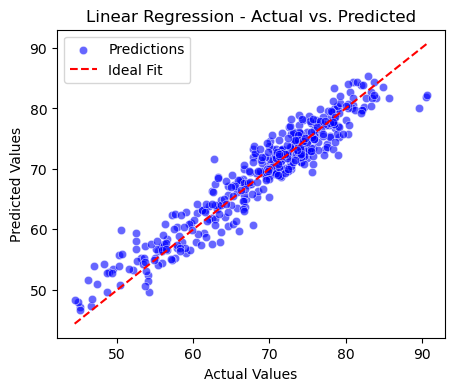

------------------------------------------------------------
Training Ridge Regression...

Ridge Regression Performance:
MAE: 2.1401224751528845
MSE: 7.427655807444305
RMSE: 2.7253725997456395
R2: 0.9100995101821554


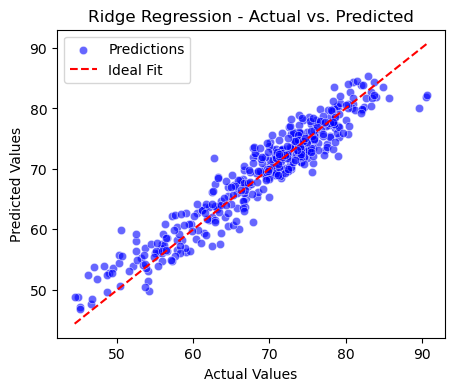

------------------------------------------------------------
Training Lasso Regression...

Lasso Regression Performance:
MAE: 2.1256329143561503
MSE: 7.504649800086337
RMSE: 2.7394615894526315
R2: 0.9091676148667299


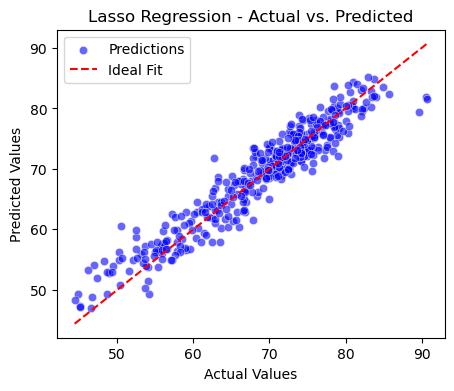

------------------------------------------------------------
Training Decision Tree...

Decision Tree Performance:
MAE: 2.7595180722891564
MSE: 13.176144578313254
RMSE: 3.6298959459347113
R2: 0.8405227864336549


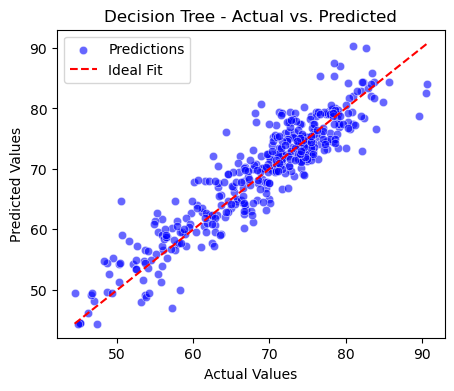

------------------------------------------------------------
Training Random Forest...

Random Forest Performance:
MAE: 1.9498216867469889
MSE: 6.160618853012047
RMSE: 2.482059397559222
R2: 0.9254350676950126


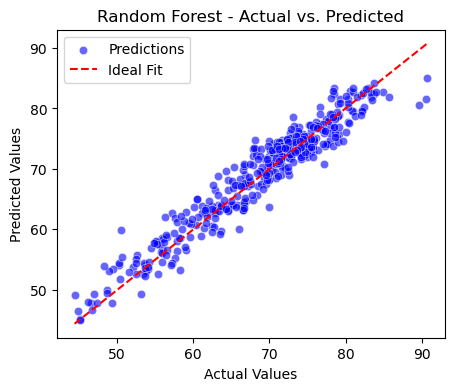

------------------------------------------------------------
Training XGBoost...

XGBoost Performance:
MAE: 2.0379077626423667
MSE: 6.757796879503698
RMSE: 2.5995762884561975
R2: 0.9182071348879692


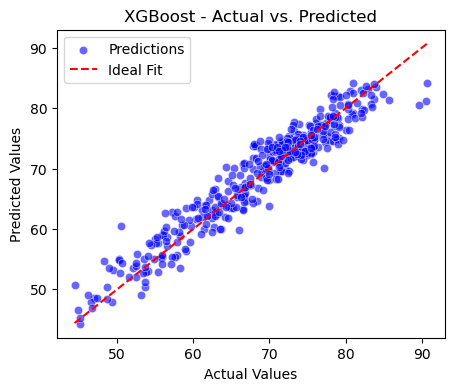

------------------------------------------------------------


In [459]:
# Train and evaluate all models
results = train_and_evaluate(models, X_train, X_val, y_train, y_val)

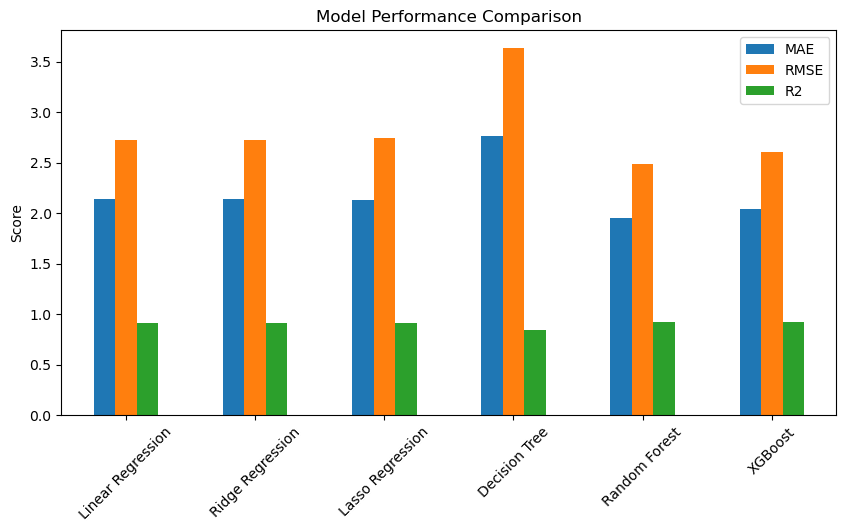

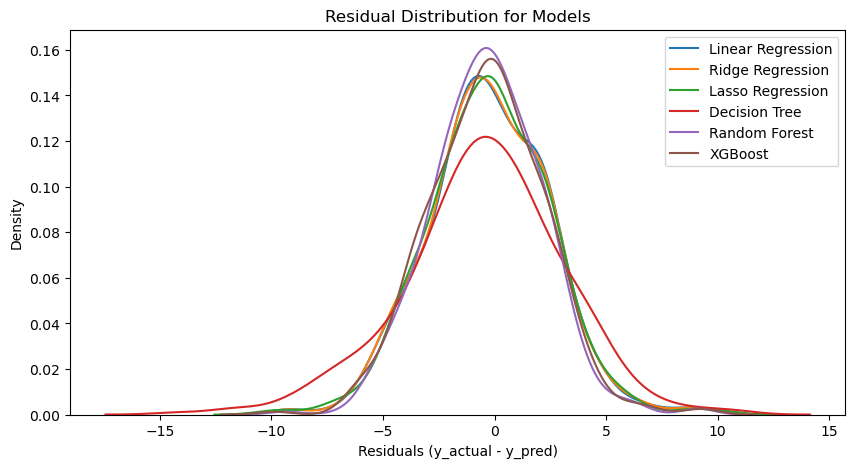

In [460]:
results_df = pd.DataFrame(results).T  # Convert dictionary to DataFrame

# Plot bar chart to compare model performance
results_df[['MAE', 'RMSE', 'R2']].plot(kind='bar', figsize=(10, 5))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.show()

print('\n')

# Plot of residuals
plt.figure(figsize=(10, 5))
for name, model in models.items():
    y_pred = model.predict(X_val)
    residuals = y_val - y_pred
    sns.kdeplot(residuals, label=name)

plt.xlabel("Residuals (y_actual - y_pred)")
plt.ylabel("Density")
plt.title("Residual Distribution for Models")
plt.legend()
plt.show()

## Model Performance Analysis  

After training multiple models, we analyze their performance using key evaluation metrics:  
- **MAE (Mean Absolute Error)**: Measures the average absolute errors. Lower is better.
- **MSE (Mean Squared Error)**: Penalizes larger errors. Lower is better.  
- **RMSE (Root Mean Squared Error)**: The square root of MSE, making it more interpretable. Lower is better.  
- **R² Score (Coefficient of Determination)**: Indicates how well the model explains variance. Closer to 1 is better.  
---
**Observations:**

- **Linear Regression, Ridge, and Lasso Regression**  
  - These models perform similarly since they are based on linear relationships.  
  - Ridge applies slight regularization, which helps with overfitting, while Lasso can eliminate less important features.  
- **Decision Tree**  
  - Prone to overfitting, as it memorizes training data instead of generalizing well.  
  - Performance may vary significantly based on the depth of the tree.  
- **Random Forest & XGBoost**  
  - These ensemble models generally perform better due to their ability to reduce overfitting.  
  - Random Forest leverages multiple decision trees, improving stability.  
  - XGBoost optimizes errors iteratively, often achieving high accuracy.  
---
**Best Model Selection:**  

- **Random Forest is the best model** based on its **lowest MAE, MSE, and RMSE** while maintaining the highest R² score.  
- **XGBoost is a close second**, offering competitive performance with a different algorithmic approach.  
- **Linear Regression-based models are decent but not as strong as ensemble methods.**  
- **Decision Tree should be avoided** due to poor generalization.   

## 6. Hyperparameters Tunning

Hyperparameter tuning helps optimize model performance by adjusting key parameters. Since **Random Forest** and **XGBoost** performed best, we will fine-tune them using **Randomized Search**.

**Random Forest Parameters:**
- n_estimators: Number of trees in the forest.
- max_depth: Maximum depth of trees to control overfitting.

- min_samples_split: Minimum samples required to split a node.

**XGBoost Parameters:**
- n_estimators: Number of boosting rounds.
- learning_rate: Step size shrinkage to prevent overfitting.
- max_depth: Limits tree depth to control complexity.

In [464]:
# Define parameter grids
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 9]
}

In [465]:
# Initialize models
rf = RandomForestRegressor(random_state=42)
xgb = XGBRegressor(random_state=42)

# Use RandomizedSearchCV for faster tuning
rf_search = RandomizedSearchCV(rf, rf_param_grid, cv=5, scoring='neg_mean_squared_error', n_iter=10, random_state=42, n_jobs=-1, verbose=1)
xgb_search = RandomizedSearchCV(xgb, xgb_param_grid, cv=5, scoring='neg_mean_squared_error', n_iter=10, random_state=42, n_jobs=-1, verbose=1)

# Fit the models
rf_search.fit(X_train, y_train)
xgb_search.fit(X_train, y_train)

# Best parameters
print("Best Random Forest Parameters:", rf_search.best_params_)
print("Best XGBoost Parameters:", xgb_search.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Random Forest Parameters: {'n_estimators': 300, 'min_samples_split': 2, 'max_depth': 20}
Best XGBoost Parameters: {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1}


**Why Use RandomizedSearchCV?**
Instead of GridSearchCV, I use RandomizedSearchCV, which:
- Speeds up tuning by testing a random subset of hyperparameter combinations instead of all possible ones.
- Provides good results faster with fewer iterations (n_iter=10), making it practical for large datasets.

Training Tuned Random Forest...

Tuned Random Forest Performance:
MAE: 1.9395523873487226
MSE: 6.050278492401577
RMSE: 2.4597313862293126
R2: 0.9267705701365254


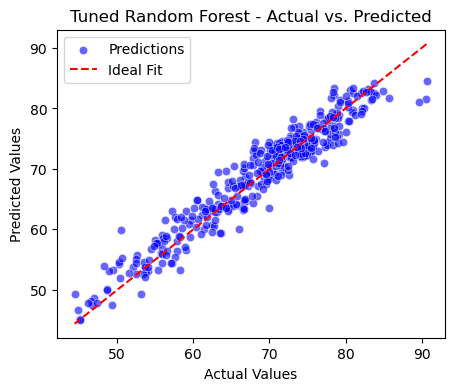

------------------------------------------------------------
Training Tuned XGBoost...

Tuned XGBoost Performance:
MAE: 1.929629921051393
MSE: 6.133663479148831
RMSE: 2.476623402770157
R2: 0.9257613215463418


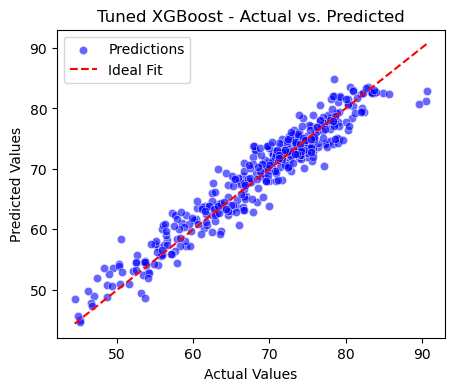

------------------------------------------------------------


In [467]:
# Get best models
best_rf = rf_search.best_estimator_
best_xgb = xgb_search.best_estimator_

# Store best models in a dictionary
tuned_models = {
    "Tuned Random Forest": best_rf,
    "Tuned XGBoost": best_xgb
}

# Evaluate best models with train_and_evaluate
tuned_results = train_and_evaluate(tuned_models, X_train, X_val, y_train, y_val)

After performing hyperparameter tuning, we extract the best versions of the models using `best_estimator_`, which gives us the model with the optimal parameters found by `RandomizedSearchCV`. We organize the tuned models into a dictionary for easy reference and evaluation. Then, we assess the performance of the optimized models by using our `train_and_evaluate`function.

Now that we have optimized our models through hyperparameter tuning, we will choose the best model with outstanding performance metrics.

In [470]:
def choose_best_model(results):
    """
    Selects the best model based on the highest R² score.
    If R² scores are similar, chooses the model with the lowest RMSE.
    """
    best_model = None
    best_metrics = None
    best_r2 = float("-inf")  # Start with the lowest possible R² score
    
    for model_name, metrics in results.items():
        r2 = metrics["R2"]
        rmse = metrics["RMSE"]
        
        if r2 > best_r2 or (r2 == best_r2 and rmse < best_metrics["RMSE"]):
            best_r2 = r2
            best_model = model_name
            best_metrics = metrics

    print(f"Best Model: {best_model}")
    for metric, value in best_metrics.items():
        print(f"{metric}: {value}")

    return best_model, best_metrics

In [471]:
# Choose the best model from tuned results
best_model_name, best_model_metrics = choose_best_model(tuned_results)

# Retrieve the actual trained model from the dictionary
best_model = tuned_models[best_model_name]

Best Model: Tuned Random Forest
MAE: 1.9395523873487226
MSE: 6.050278492401577
RMSE: 2.4597313862293126
R2: 0.9267705701365254


## 7. Apply For Testing Data

In [473]:
# Drop ID column in test data
X_test = test_df.drop(columns=["ID"], errors="ignore")  # Avoids error if ID is already dropped

In [474]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 867 entries, 0 to 866
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       867 non-null    float64
 1   Year                          867 non-null    float64
 2   Status                        867 non-null    float64
 3   AdultMortality                867 non-null    float64
 4   AdultMortality-Male           867 non-null    float64
 5   AdultMortality-Female         867 non-null    float64
 6   SLS                           867 non-null    float64
 7   Alcohol                       867 non-null    float64
 8   PercentageExpenditure         867 non-null    float64
 9   Measles                       867 non-null    float64
 10  BMI                           867 non-null    float64
 11  Under5LS                      867 non-null    float64
 12  Polio                         867 non-null    float64
 13  Total

In [475]:
# Make predictions
y_test_pred = best_model.predict(X_test)
    
# Create a DataFrame with ID and TARGET_LifeExpectancy
predictions_df = pd.DataFrame({
        "ID": test_df.index,
        "TARGET_LifeExpectancy": y_test_pred  # Predictions
})

In [535]:
print(predictions_df)

      ID  TARGET_LifeExpectancy
0      0              70.252333
1      1              69.826667
2      2              69.984667
3      3              70.093333
4      4              69.797667
..   ...                    ...
862  862              66.453667
863  863              65.821333
864  864              68.177333
865  865              66.224000
866  866              65.640333

[867 rows x 2 columns]


In [533]:
# Save to CSV
filename = "s3978798_predictions.csv"
predictions_df.to_csv(filename, index=False)

print(f"Predictions saved to '{filename}'")

Predictions saved to 's3978798_predictions.csv'
